<a href="https://colab.research.google.com/github/Eldridge-Evan/Messing-Around/blob/main/Modelling_Battlefield_Attrition_w_Lanchester_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# Runge-Kutta method
def RK4_s(t,f,y0):
    y=np.zeros((len(t),len(y0)));y[0]=y0
    h=t[1]-t[0]
    for i in range(0,len(t)-1):
        k1=h*f(t[i],y[i])
        k2=h*f(t[i]+h/2,y[i]+k1/2)
        k3=h*f(t[i]+h/2,y[i]+k2/2)
        k4=h*f(t[i]+h,y[i]+k3)
        y[i+1]=y[i]+(k1+2*k2+2*k3+k4)/6
    return y

$Y(t),\ X(t)$ Number of soldiers in army $Y$ / $X$ as a function of time. $\alpha$ attrition on $X$, $\beta$ attrition on $Y$.

$X(0) = 500,\ Y(0) = 1000$

$$\frac{dX(t)}{dt} = \alpha Y(t)$$

$$\frac{dY(t)}{dt} = \beta X(t)$$



In [4]:
def pop(t, y): # population differential equations # gamma and beta
  alpha, beta = (-4/5), (-11/10)
  armysize = np.array([alpha*y[1],beta*y[0]]) # X, Y
  return armysize

In [5]:
t0, tf, h1 = 0, 0.5, 0.001 # start, end and time steps
f0 = np.array((1000,500)) # initial number of soldiers
t1 = np.arange(t0,tf+h1,h1) # our time hrs

In [6]:
popR1 = RK4_s(t1, pop, f0)

(0.0, 1000.0)

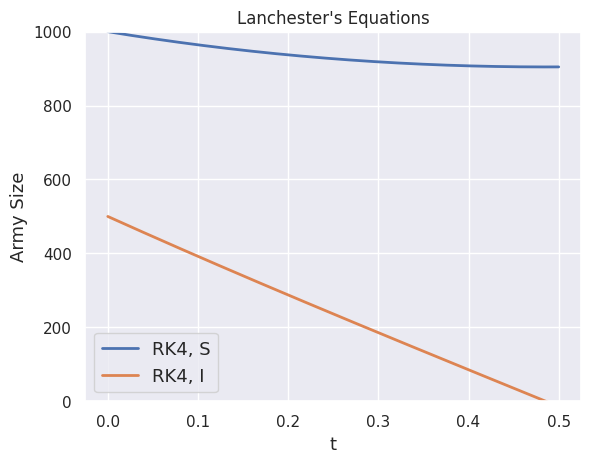

In [ ]:
plt.plot(t1, popR1[:,0], label='RK4, S', linewidth=2)
plt.plot(t1, popR1[:,1], label='RK4, I', linewidth=2)
plt.legend(fontsize=13, loc='best'); #plt.xlim(100,110)
plt.xlabel('t', fontsize=13); plt.ylabel('Army Size', fontsize=13); plt.title("Lanchester's Equations")
plt.ylim(0,1000)